# Plot results


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

EXPERIMENT_FOR_MODEL = 5


original_logistic_regression = pd.read_csv('./sample/gender_inference_logistic_regression.csv', header=None)
original_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

avg_logistic_regression = pd.read_csv('./obfuscation_pipeline/avg/gender_inference_logistic-regression.csv', header=None)
avg_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

pred_logistic_regression = pd.read_csv('./obfuscation_pipeline/pred/gender_inference_logistic-regression.csv', header=None)
pred_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

filtered_logistic_regression = pd.read_csv('./obfuscation_pipeline/filtered/gender_inference_logistic-regression.csv', header=None)
filtered_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

fairrecsys_logistic_regression = pd.read_csv('../../fairecsys/results/movielens1m/gender_inference_logistic-regression.csv', header=None)
fairrecsys_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


### Pipeline comparison


In [156]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'accuracy']
required_experiments = [[0, 'user_knn'], [3, 'bprmf'], [5, 'wrmf'], [7, 'multidae']]

def perform_plot(models, metric, title='Comparison', resource_name='comparison.png'):
    plt.style.use('ggplot')
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(title)
    i = 0
    for ax in axs.flat:
        ax.set_ylabel('balanced accuracy', fontsize=9)
        ax.set_ylim([0,1])
        ax.grid(color='lightgray', linestyle='--', linewidth=1)
        ax.set_facecolor('w')
        #ax.legend(legend, loc='lower right', fontsize=10)
        ax.axhline(y = 0.5, color = 'dimgrey', linestyle = '--', linewidth=1)
        ax.set_title(required_experiments[i][1], fontsize=10)

        first_item = 1 + EXPERIMENT_FOR_MODEL * required_experiments[i][0]
        for model in models:
            observation = model.iloc[0,:]
            model_filtered = model.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
            model_filtered.loc[-1] = observation
            model_filtered.index = model_filtered.index + 1  # shifting index
            model_filtered.sort_index(inplace=True)
            model_filtered[metric].plot(kind='line', ax=ax)

        labels = ['observation', 'embeddings', 'relevance', 'recs-10', 'recs-20', 'recs-50']
        indices = range(len(labels))
        ax.set_xticks(indices)
        ax.set_xticklabels(labels, rotation=90)
        i += 1

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    #plt.setp(axs, xticks=indices, xticklabels=labels)

    plt.gca().set_facecolor('w')
    fig.patch.set_facecolor('w')

    legend = ['original', 'PerBlur pred', 'PerBlur avg', 'filtered', 'fairrecsys']
    fig.legend(legend, loc='lower center', fontsize=10, bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=False, ncol=5)

    fig.tight_layout()
    plt.savefig('paper_plot_fig/'+ resource_name, bbox_inches='tight')






* Logistic Regression - gender

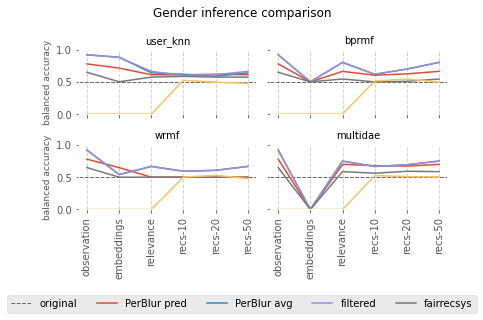

In [157]:
_models = [original_logistic_regression, pred_logistic_regression, avg_logistic_regression, filtered_logistic_regression, fairrecsys_logistic_regression]
perform_plot(_models, metrics[0], 'Gender inference comparison', 'comparison_gender.png')
